<a href="https://colab.research.google.com/github/nazaninbondarian/MachineLearning2024/blob/main/Project/Project_exm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

# Suppress all FutureWarnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.append('../src')

In [3]:
pip install pykoopman

In [10]:
import numpy as np
from scipy . integrate import odeint
import matplotlib.pyplot as plt
import random

from pykoopman import Koopman
from pykoopman.observables import Polynomial
from pykoopman.regression import EDMD

In [5]:
def slow_manifold(x, t):
    return [
        -0.05 * x[0],
       -x[1] + x[0]**2
    ]

In [6]:
dt = 0.02
t = np . arange (0, 50, dt)

X = []
Xnext = []
for x0_0 in np.linspace (-1, 1, 10):
  for x0_1 in np.linspace (-1, 1, 10):
    x0 = np.array ([x0_0 , x0_1])
    x_tmp = odeint(slow_manifold, x0, t)
    X.append (x_tmp [:-1,:] )
    Xnext.append ( x_tmp [ 1:,:])

X = np.vstack (X)
Xnext = np.vstack (Xnext)

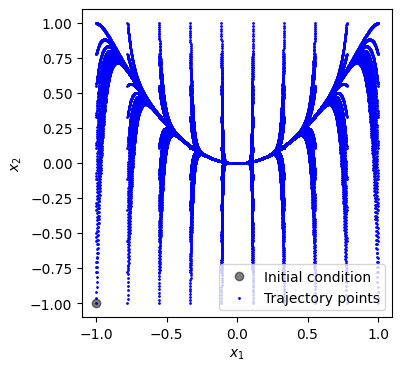

In [7]:
plt.figure(figsize=(4, 4))
plt.plot(X[0, 0], X[0, 1], 'o', color='black', label="Initial condition", alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], s=1, color='blue', label='Trajectory points')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='best')
plt.show()

In [8]:
model = Koopman (observables=Polynomial(2), regressor=EDMD())
model.fit (X, Xnext)

Koopman(observables=Polynomial(), regressor=EDMD())

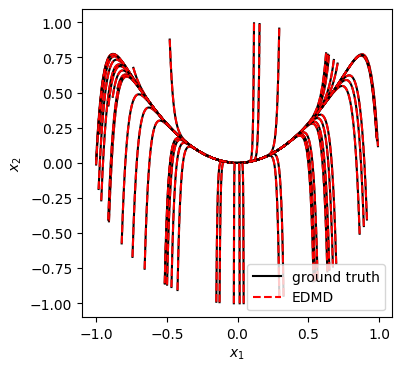

In [9]:
random.seed(76)

plt.figure(figsize=(4, 4))
theta = (np.random.rand(1 ,50))*2*np.pi
x0_test_array = np.stack ((np.cos(theta) ,np.sin(theta)) ,axis=2).reshape(-1, 2)

for x0_test in x0_test_array:
  xtest_true = odeint(slow_manifold, x0_test.flatten(), t)
  xtest_pred = model.simulate(x0_test ,n_steps=t.size-1)
  xtest_pred = np.vstack([ xtest_true[0] ,xtest_pred])

  plt.plot (xtest_true [: ,0] , xtest_true [: ,1] , 'k')
  plt.plot (xtest_pred [: ,0] , xtest_pred [: ,1] , 'r--')

plt.xlabel ( r'$x_1$')
plt.ylabel ( r'$x_2$')
plt.plot (xtest_true [0 ,0] , xtest_true [0 ,1] , 'k',label='ground truth')
plt.plot (xtest_pred [0 ,0] , xtest_pred [0 ,1] , 'r--',label='EDMD')
plt.legend(loc='best')